<a href="https://colab.research.google.com/github/sungjindo/algorithmtrading/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cvxopt as opt
from cvxopt import solvers
import warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/bigdata_fintech_python-main/ETF 수정주가.xlsx', index_col = 0)

In [ ]:
data

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,TIGER 골드선물(H),KBSTAR KRX300미국달러선물혼합,KINDEX 스마트퀄리티,KINDEX 스마트로우볼,KINDEX 스마트하이베타,HANARO e커머스,HANARO 고배당
Name,,,,,,,,,,,,,,,,,,,,,
2008-01-02,20269,20727,11495,8876,6826,32556,8896,10608,8646,19165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,20247,20788,11388,8777,7036,32548,8788,10589,8584,18770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,20341,20845,10958,8802,6826,32671,8800,10608,8700,18825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,19929,20475,10654,8673,6780,31960,8655,10340,8514,18605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,19861,20418,10586,8594,6734,31823,8589,10275,8382,18970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,29055,29420,22815,7675,15710,46835,7855,23180,9490,21965,...,10830.0,10690.0,6060.0,9830.0,10300.0,12630.0,12430.0,10020.0,NaN,NaN
2019-04-23,29105,29460,22940,7730,15870,46855,7935,23370,9475,22285,...,10880.0,10680.0,6060.0,9810.0,10315.0,12620.0,12420.0,9995.0,9925.0,9955.0
2019-04-24,28790,29165,22785,7630,15950,46325,7810,23180,9490,22220,...,10745.0,10765.0,6020.0,9760.0,10240.0,12505.0,12320.0,9860.0,9835.0,9945.0


In [ ]:
holding_periods=1
n_term=252 # dailiy return을 annualize

returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr()[exp_rets[exp_rets > 0].index] # corr

In [ ]:
data_up = data[exp_rets[exp_rets > 0].index]
data_up

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KBSTAR 중국MSCI China선물(H),TIGER 200TR,TIGER MSCI Korea TR,KODEX 미국FANG플러스(H),HANARO 농업융복합산업,KODEX Top5PlusTR,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,KBSTAR KRX300미국달러선물혼합
Name,,,,,,,,,,,,,,,,,,,,,
2008-01-02,20269,20727,11495,8876,6826,32556,8896,10608,8646,19165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,20247,20788,11388,8777,7036,32548,8788,10589,8584,18770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,20341,20845,10958,8802,6826,32671,8800,10608,8700,18825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,19929,20475,10654,8673,6780,31960,8655,10340,8514,18605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,19861,20418,10586,8594,6734,31823,8589,10275,8382,18970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,29055,29420,22815,7675,15710,46835,7855,23180,9490,21965,...,11435.0,14560.0,11085.0,11530.0,10710.0,13190.0,10830.0,10690.0,6060.0,10300.0
2019-04-23,29105,29460,22940,7730,15870,46855,7935,23370,9475,22285,...,11535.0,14590.0,11085.0,11625.0,10795.0,13260.0,10880.0,10680.0,6060.0,10315.0
2019-04-24,28790,29165,22785,7630,15950,46325,7810,23180,9490,22220,...,11510.0,14435.0,10965.0,11920.0,10650.0,13105.0,10745.0,10765.0,6020.0,10240.0


In [ ]:
holding_periods=1
n_term=252 # dailiy return을 annualize

returns = data_up.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr()[exp_rets[exp_rets > 0].index] # corr

In [ ]:
returns

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KBSTAR 중국MSCI China선물(H),TIGER 200TR,TIGER MSCI Korea TR,KODEX 미국FANG플러스(H),HANARO 농업융복합산업,KODEX Top5PlusTR,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,KBSTAR KRX300미국달러선물혼합
Name,,,,,,,,,,,,,,,,,,,,,
2008-01-03,-0.001085,0.002943,-0.009308,-0.011154,0.030765,-0.000246,-0.012140,-0.001791,-0.007171,-0.020610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,0.004643,0.002742,-0.037759,0.002848,-0.029847,0.003779,0.001365,0.001794,0.013514,0.002930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,-0.020255,-0.017750,-0.027742,-0.014656,-0.006739,-0.021762,-0.016477,-0.025264,-0.021379,-0.011687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,-0.003412,-0.002784,-0.006383,-0.009109,-0.006785,-0.004287,-0.007626,-0.006286,-0.015504,0.019618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-09,0.006445,0.004702,0.010486,-0.002909,-0.002673,0.006976,-0.000931,0.010803,0.001790,-0.010807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,0.000172,0.000340,-0.008475,-0.005185,-0.003489,0.000000,-0.008207,-0.011514,-0.001053,-0.004306,...,-0.006947,-0.000343,0.000000,-0.000867,0.000467,-0.006777,-0.003680,0.008491,-0.000824,-0.069137
2019-04-23,0.001721,0.001360,0.005479,0.007166,0.010185,0.000427,0.010185,0.008197,-0.001581,0.014569,...,0.008745,0.002060,0.000000,0.008239,0.007937,0.005307,0.004617,-0.000935,0.000000,0.001456
2019-04-24,-0.010823,-0.010014,-0.006757,-0.012937,0.005041,-0.011311,-0.015753,-0.008130,0.001583,-0.002917,...,-0.002167,-0.010624,-0.010825,0.025376,-0.013432,-0.011689,-0.012408,0.007959,-0.006601,-0.007271


In [ ]:
corr_mat['TIGER 미국S&P500선물(H)'][corr_mat['TIGER 미국S&P500선물(H)'] >= 0].sort_values()

ARIRANG S&P글로벌인프라           0.026809
TIGER 단기채권액티브               0.062764
KODEX 골드선물인버스(H)            0.093460
TIGER S&P글로벌인프라(합성)         0.095672
KODEX S&P글로벌인프라(합성)         0.121875
                              ...   
KODEX 미국러셀2000(H)           0.862820
TIGER 미국S&P500레버리지(합성 H)    0.921255
KODEX 미국나스닥100선물(H)         0.923966
ARIRANG 미국S&P500(H)         0.941933
TIGER 미국S&P500선물(H)         1.000000
Name: TIGER 미국S&P500선물(H), Length: 225, dtype: float64

# 1

In [ ]:
data_1 = data[['TIGER 미국S&P500선물(H)','ARIRANG S&P글로벌인프라']]
data_1 = data_1.dropna()

In [ ]:
data_1

,TIGER 미국S&P500선물(H),ARIRANG S&P글로벌인프라
Name,,
2017-05-16,28450.0,9848.0
2017-05-17,28250.0,9893.0
2017-05-18,27975.0,9873.0
2017-05-19,28020.0,9893.0
2017-05-22,28265.0,9913.0
...,...,...
2019-04-22,34180.0,10855.0
2019-04-23,34290.0,10870.0
2019-04-24,34545.0,10980.0


In [ ]:
holding_periods=1
n_term = 252

returns_1 = data_1.pct_change(holding_periods).iloc[holding_periods:] 

exp_rets_1 = returns_1.mean() * n_term 
cov_mat_1 = returns_1.cov() * n_term 
corr_mat_1 = returns_1.corr() 

In [ ]:
cov_mat = returns_1.cov()
var_1 = np.diag(cov_mat)
annulized_var_1 = var_1 * n_term
daily_std_1 = returns_1.std()
annulized_std_1 = daily_std_1 * np.sqrt(917)

In [ ]:
ratio = []
mean_1 = []
val_1= []

for i in range(300):
    random = np.random.random(2)
    random = random/random.sum()

    if random.dot(exp_rets_1) > 0:
     ratio.append(random)
     mean_1.append(random.dot(exp_rets_1))
     val_1.append(np.round((random.dot(cov_mat_1)).dot(random),3))

mean_1 = np.array(mean_1)
val_1 = np.array(val_1)


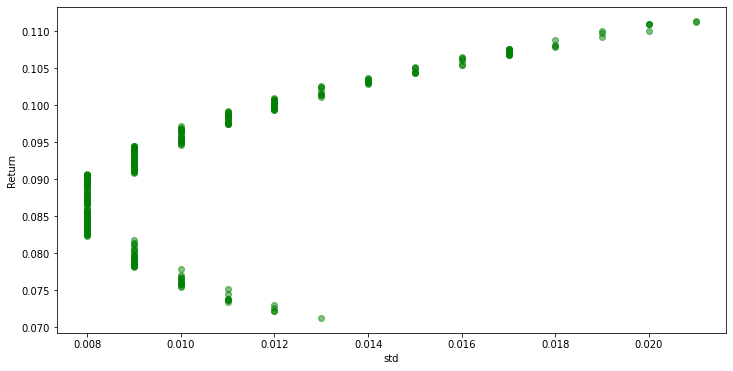

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(val_1,mean_1, color='green', alpha = 0.5)
ax.set_xlabel("std")
ax.set_ylabel("Return")
plt.show()

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [ ]:
max_risk=0.5
max_ret = exp_rets_1.max()
min_ret = exp_rets_1[exp_rets_1 > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(0, n_step+1):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_1, exp_rets_1, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_1), _w))

    if risk > max_risk:
        break

    risks.append(risk)
    ret = np.dot(exp_rets_1, _w)
    rets.append(ret)
    weights.append(_w)


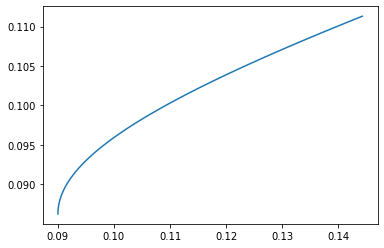

In [ ]:
plt.plot(risks, rets)
plt.show()

In [ ]:
min_risk_idx = np.argmin(risks)
min_risk = risks[min_risk_idx] 
min_risk_ret = rets[min_risk_idx]
min_risk_weight = weights[min_risk_idx]
print("Risk of minimum variance portfolio : ", min_risk)
print("Return of minimum variance portfolio : ", min_risk_ret)
print("Weight of minimum variance portfolio :  ")
print(min_risk_weight)

Risk of minimum variance portfolio :  0.09001923853767707
Return of minimum variance portfolio :  0.08626412061568257
Weight of minimum variance portfolio :  
TIGER 미국S&P500선물(H)    0.376274
ARIRANG S&P글로벌인프라      0.623726
dtype: float64


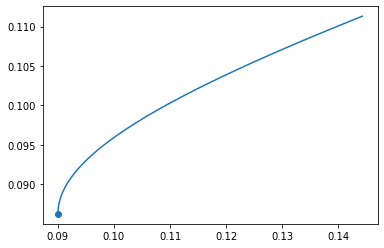

In [ ]:
plt.plot(risks, rets)
plt.scatter(min_risk, min_risk_ret)
plt.show()

In [ ]:
# Efficient Frontier

max_risk=0.5
max_ret = exp_rets_1.max()
min_ret = exp_rets_1[exp_rets_1 > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_1, exp_rets_1, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_1), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets_1, _w)
    rets.append(ret)
    weights.append(_w)


rf_rate = 0.005

slopes = []

# ToDo
for i in range(len(rets)):
    slope_ = (rets[i] - rf_rate) / risks[i]
    slopes.append(slope_)

max_tangency_idx = np.argmax(slopes)
max_tangency = slopes[max_tangency_idx]

In [ ]:
max_tangency_risk = risks[max_tangency_idx]
max_tangency_return = rets[max_tangency_idx]
max_tangency_weight = weights[max_tangency_idx]

print("Risk of tangency portfolio : ", max_tangency_risk)
print("Return of tangency portfolio : ", max_tangency_return)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return - rf_rate) / max_tangency_risk)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight)

Risk of tangency portfolio :  0.09275543896652193
Return of tangency portfolio :  0.0912308357298902
Sharpe ratio of tangency portfolio :  0.929657998395257
Weight of minimum variance portfolio : 
TIGER 미국S&P500선물(H)    0.500001
ARIRANG S&P글로벌인프라      0.499999
dtype: float64


In [ ]:
ys = []
for i in range(len(risks)):
    ys.append(max_tangency * risks[i] + rf_rate)

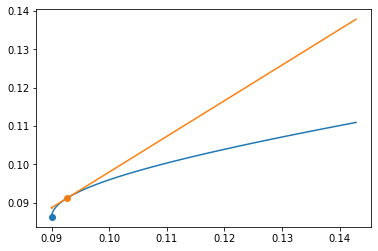

In [ ]:
plt.plot(risks, rets)
plt.plot(risks, ys)
plt.scatter(min_risk, min_risk_ret)
plt.scatter(max_tangency_risk, max_tangency_return)
plt.show()

In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12

    return returns, cov_mat, avg_rets

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.005):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    for i in range(100):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights

In [ ]:
def back_test(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 60 # 3개월에 한번 = 분기당 한번
    window_size = 120 # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = 60
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            print(_w)
            _w.plot.bar()
            plt.show()
            plt.close()
            _w = np.asarray(_w.values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = 60
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

In [ ]:
data_1_1 = data_1['2017-04-16':'2019-04-26']

In [ ]:
data_1_1 = data_1_1.dropna()

In [ ]:
ret = data_1_1.pct_change().iloc[1:]

5
TIGER 미국S&P500선물(H)    0.62001
ARIRANG S&P글로벌인프라      0.37999
dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_

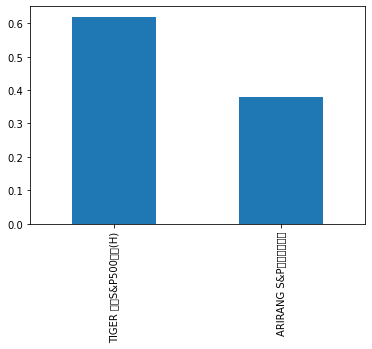

4
TIGER 미국S&P500선물(H)    0.99
ARIRANG S&P글로벌인프라      0.01
dtype: float64


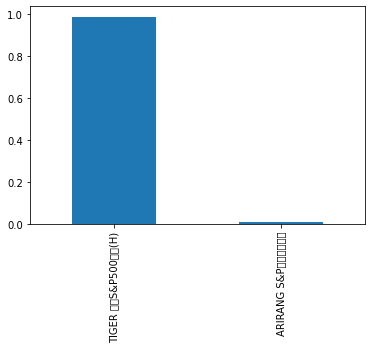

3
TIGER 미국S&P500선물(H)    0.99
ARIRANG S&P글로벌인프라      0.01
dtype: float64


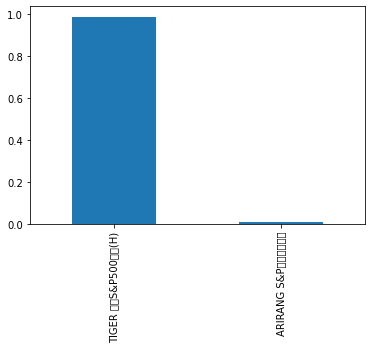

2
TIGER 미국S&P500선물(H)    0.39
ARIRANG S&P글로벌인프라      0.61
dtype: float64


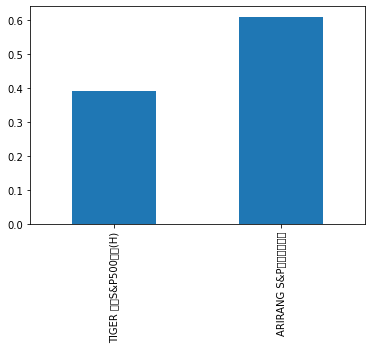

1
TIGER 미국S&P500선물(H)    0.039999
ARIRANG S&P글로벌인프라      0.960001
dtype: float64


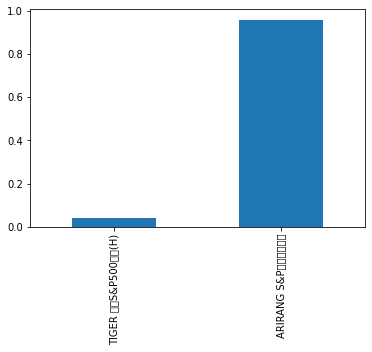

0
TIGER 미국S&P500선물(H)    1.030170e-07
ARIRANG S&P글로벌인프라      9.999999e-01
dtype: float64


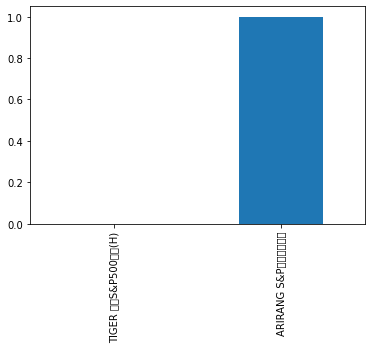

In [ ]:
w, portfolio, rebalancing_date = back_test(data_1_1[1:], ret)

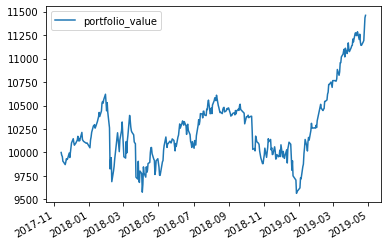

In [ ]:
portfolio.plot()

# 2

In [ ]:
holding_periods=1
n_term=252 # dailiy return을 annualize

returns = data_up.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr()[exp_rets[exp_rets > 0].index] # corr

In [ ]:
returns_ratio = returns.mean()/ np.sqrt(returns.var())
returns_ratio.sort_values(ascending=False)[:30]

HANARO 단기통안채            1.096708
KINDEX 단기통안채            1.006353
KODEX 단기채권PLUS          0.790563
ARIRANG 단기유동성           0.782713
TIGER 단기채권액티브           0.668935
KODEX 단기변동금리부채권액티브      0.560458
KBSTAR 단기국공채액티브         0.536692
KBSTAR 단기통안채            0.496992
ARIRANG 단기우량채권          0.447436
KODEX 단기채권              0.402539
ARIRANG 단기채권액티브         0.401321
KOSEF 단기자금              0.374218
ARIRANG 우량회사채50 1년      0.250668
ARIRANG 국채선물3년          0.239504
KINDEX 싱가포르리츠           0.213994
KBSTAR 중기우량회사채          0.196237
TIGER 중장기국채             0.191035
KBSTAR 국채선물10년          0.190087
KODEX 미국FANG플러스(H)      0.175230
ARIRANG 국채선물10년         0.163664
KODEX 종합채권(AA-이상)액티브    0.154594
ARIRANG KRX300자유소비재     0.151918
KBSTAR 국고채3년            0.139669
파워 중기국고채                0.127146
KINDEX 중장기국공채액티브        0.126767
KBSTAR 중장기국공채액티브        0.119841
KINDEX 미국WideMoat가치주    0.115616
KODEX 미국채10년선물          0.112994
ARIRANG 바벨 채권           0.107660
TIGER 지주회사              0.106589
dtype: flo

In [ ]:
data['ARIRANG KRX300자유소비재'][data['ARIRANG KRX300자유소비재'].notnull()]

Name
2018-11-08    10350.0
2018-11-09    10380.0
2018-11-12    10185.0
2018-11-13    10215.0
2018-11-14    10295.0
               ...   
2019-04-22    12600.0
2019-04-23    12705.0
2019-04-24    12715.0
2019-04-25    12665.0
2019-04-26    12545.0
Name: ARIRANG KRX300자유소비재, Length: 115, dtype: float64

In [ ]:
corr_mat['ARIRANG KRX300자유소비재'][corr_mat['ARIRANG KRX300자유소비재'] >= 0].sort_values()


KODEX 선진국MSCI World      0.001446
KODEX 단기채권PLUS           0.006801
KODEX 단기채권               0.018638
KODEX 글로벌4차산업로보틱스(합성)    0.020176
KODEX 미국S&P산업재(합성)       0.022814
                           ...   
KODEX 배당성장               0.690354
KOSEF 블루칩                0.696007
ARIRANG 스마트베타 Quality    0.719896
KODEX 자동차                0.904843
ARIRANG KRX300자유소비재      1.000000
Name: ARIRANG KRX300자유소비재, Length: 218, dtype: float64

In [ ]:
data_2 = data[['ARIRANG KRX300자유소비재','KODEX 선진국MSCI World']]
data_2 = data_2.dropna()

In [ ]:
data_2

,ARIRANG KRX300자유소비재,KODEX 선진국MSCI World
Name,,
2018-11-08,10350.0,12680.0
2018-11-09,10380.0,12725.0
2018-11-12,10185.0,12655.0
2018-11-13,10215.0,12420.0
2018-11-14,10295.0,12420.0
...,...,...
2019-04-22,12600.0,13465.0
2019-04-23,12705.0,13530.0
2019-04-24,12715.0,13570.0


In [ ]:
holding_periods=1
n_term = 252

returns_2 = data_2.pct_change(holding_periods).iloc[holding_periods:] 

exp_rets_2 = returns_2.mean() * n_term 
cov_mat_2 = returns_2.cov() * n_term 
corr_mat_2 = returns_2.corr() 

In [ ]:
ratio_2 = []
mean_2 = []
val_2= []

for i in range(300):
    random = np.random.random(2)
    random = random/random.sum()

    if random.dot(exp_rets_2) > 0:
     ratio_2.append(random)
     mean_2.append(random.dot(exp_rets_2))
     val_2.append(np.round((random.dot(cov_mat_2)).dot(random),3))

mean_2 = np.array(mean_2)
val_2 = np.array(val_2)


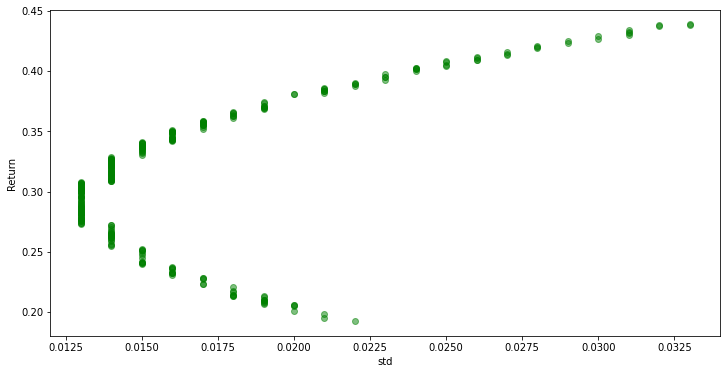

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(val_2,mean_2, color='green', alpha = 0.5)
ax.set_xlabel("std")
ax.set_ylabel("Return")
plt.show()

In [ ]:
max_risk=0.5
max_ret = exp_rets_2.max()
min_ret = exp_rets_2[exp_rets_2 > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(0, n_step+1):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_2, exp_rets_2, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_2), _w))

    if risk > max_risk:
        break

    risks.append(risk)
    ret = np.dot(exp_rets_2, _w)
    rets.append(ret)
    weights.append(_w)


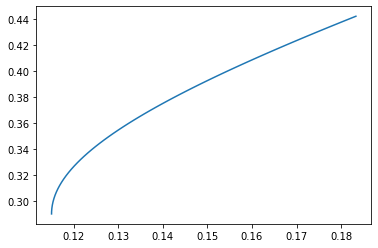

In [ ]:
plt.plot(risks, rets)
plt.show()

In [ ]:
min_risk_idx = np.argmin(risks)
min_risk = risks[min_risk_idx] 
min_risk_ret = rets[min_risk_idx]
min_risk_weight = weights[min_risk_idx]
print("Risk of minimum variance portfolio : ", min_risk)
print("Return of minimum variance portfolio : ", min_risk_ret)
print("Weight of minimum variance portfolio :  ")
print(min_risk_weight)

Risk of minimum variance portfolio :  0.11499484336995527
Return of minimum variance portfolio :  0.29043100198600985
Weight of minimum variance portfolio :  
ARIRANG KRX300자유소비재    0.392725
KODEX 선진국MSCI World    0.607275
dtype: float64


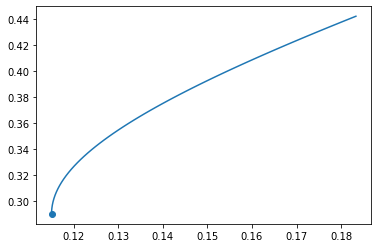

In [ ]:
plt.plot(risks, rets)
plt.scatter(min_risk, min_risk_ret)
plt.show()

In [ ]:
# Efficient Frontier

max_risk=0.5
max_ret = exp_rets_2.max()
min_ret = exp_rets_2[exp_rets_2 > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_2, exp_rets_2, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_2), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets_2, _w)
    rets.append(ret)
    weights.append(_w)


rf_rate = 0.005

slopes = []

# ToDo
for i in range(len(rets)):
    slope_ = (rets[i] - rf_rate) / risks[i]
    slopes.append(slope_)

max_tangency_idx = np.argmax(slopes)
max_tangency = slopes[max_tangency_idx]

In [ ]:
max_tangency_risk = risks[max_tangency_idx]
max_tangency_return = rets[max_tangency_idx]
max_tangency_weight = weights[max_tangency_idx]

print("Risk of tangency portfolio : ", max_tangency_risk)
print("Return of tangency portfolio : ", max_tangency_return)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return - rf_rate) / max_tangency_risk)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight)

Risk of tangency portfolio :  0.1248958562261349
Return of tangency portfolio :  0.3422098960200996
Sharpe ratio of tangency portfolio :  2.699928614201191
Weight of minimum variance portfolio : 
ARIRANG KRX300자유소비재    0.600001
KODEX 선진국MSCI World    0.399999
dtype: float64


In [ ]:
ys = []
for i in range(len(risks)):
    ys.append(max_tangency * risks[i] + rf_rate)

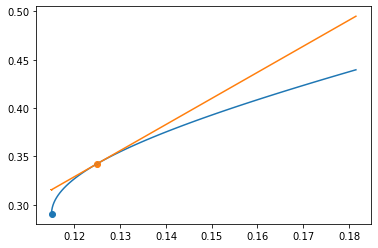

In [ ]:
plt.plot(risks, rets)
plt.plot(risks, ys)
plt.scatter(min_risk, min_risk_ret)
plt.scatter(max_tangency_risk, max_tangency_return)
plt.show()

In [ ]:
data_2_1 = data_2['2017-04-16':'2019-04-26']

In [ ]:
data_2_1 = data_2_1.dropna()

In [ ]:
ret = data_2_1.pct_change().iloc[1:]

In [ ]:
ret

,ARIRANG KRX300자유소비재,KODEX 선진국MSCI World
Name,,
2018-11-09,0.002899,0.003549
2018-11-12,-0.018786,-0.005501
2018-11-13,0.002946,-0.018570
2018-11-14,0.007832,0.000000
2018-11-15,0.023798,-0.004026
...,...,...
2019-04-22,-0.000793,0.010128
2019-04-23,0.008333,0.004827
2019-04-24,0.000787,0.002956


In [ ]:
data_2_1

,ARIRANG KRX300자유소비재,KODEX 선진국MSCI World
Name,,
2018-11-08,10350.0,12680.0
2018-11-09,10380.0,12725.0
2018-11-12,10185.0,12655.0
2018-11-13,10215.0,12420.0
2018-11-14,10295.0,12420.0
...,...,...
2019-04-22,12600.0,13465.0
2019-04-23,12705.0,13530.0
2019-04-24,12715.0,13570.0


In [ ]:
w, portfolio, rebalancing_date = back_test(data_2_1[1:], ret)

In [ ]:
portfolio

,portfolio_value


# 3

In [ ]:
holding_periods=1
n_term=252 # dailiy return을 annualize

returns = data_up.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr() # corr

In [ ]:
returns

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KBSTAR 중국MSCI China선물(H),TIGER 200TR,TIGER MSCI Korea TR,KODEX 미국FANG플러스(H),HANARO 농업융복합산업,KODEX Top5PlusTR,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,KBSTAR KRX300미국달러선물혼합
Name,,,,,,,,,,,,,,,,,,,,,
2008-01-03,-0.001085,0.002943,-0.009308,-0.011154,0.030765,-0.000246,-0.012140,-0.001791,-0.007171,-0.020610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,0.004643,0.002742,-0.037759,0.002848,-0.029847,0.003779,0.001365,0.001794,0.013514,0.002930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,-0.020255,-0.017750,-0.027742,-0.014656,-0.006739,-0.021762,-0.016477,-0.025264,-0.021379,-0.011687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,-0.003412,-0.002784,-0.006383,-0.009109,-0.006785,-0.004287,-0.007626,-0.006286,-0.015504,0.019618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-09,0.006445,0.004702,0.010486,-0.002909,-0.002673,0.006976,-0.000931,0.010803,0.001790,-0.010807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,0.000172,0.000340,-0.008475,-0.005185,-0.003489,0.000000,-0.008207,-0.011514,-0.001053,-0.004306,...,-0.006947,-0.000343,0.000000,-0.000867,0.000467,-0.006777,-0.003680,0.008491,-0.000824,-0.069137
2019-04-23,0.001721,0.001360,0.005479,0.007166,0.010185,0.000427,0.010185,0.008197,-0.001581,0.014569,...,0.008745,0.002060,0.000000,0.008239,0.007937,0.005307,0.004617,-0.000935,0.000000,0.001456
2019-04-24,-0.010823,-0.010014,-0.006757,-0.012937,0.005041,-0.011311,-0.015753,-0.008130,0.001583,-0.002917,...,-0.002167,-0.010624,-0.010825,0.025376,-0.013432,-0.011689,-0.012408,0.007959,-0.006601,-0.007271


In [ ]:
high = []
low = []
for i in range(len(exp_rets)):
  high.append(returns.iloc[:,i].max())
  low.append(returns.iloc[:,i].min())

In [ ]:
print(np.mean(high))
print(max(high))
print(np.argmax(high))


0.06564859120127421
0.599548532731377
224


In [ ]:
print(np.mean(low))
print(min(low))
print(np.argmin(low))

-0.06438531018315134
-0.3790572960767711
224


In [ ]:
returns.iloc[:,224][returns.iloc[:,224].notnull()]

Name
2017-09-01    0.011319
2017-09-04   -0.029197
2017-09-05   -0.001003
2017-09-06    0.022579
2017-09-07    0.013739
                ...   
2019-04-22    0.000797
2019-04-23   -0.001194
2019-04-24   -0.011957
2019-04-25   -0.017346
2019-04-26   -0.021757
Name: KBSTAR 코스닥150선물레버리지, Length: 401, dtype: float64

In [ ]:
corr_mat['KBSTAR 코스닥150선물레버리지'][corr_mat['KBSTAR 코스닥150선물레버리지'] >= 0].sort_values()

KODEX 글로벌4차산업로보틱스(합성)     0.001497
KINDEX 골드선물 레버리지(합성 H)    0.019709
KINDEX 미국WideMoat가치주      0.033078
KODEX 미국S&P IT(합성)        0.040022
TIGER 라틴35                0.045183
                            ...   
KODEX KRX300레버리지          0.699264
KBSTAR KRX300레버리지         0.705476
ARIRANG KRX300헬스케어        0.793167
KOSEF 코스닥150              0.895268
KBSTAR 코스닥150선물레버리지       1.000000
Name: KBSTAR 코스닥150선물레버리지, Length: 219, dtype: float64

In [ ]:
data_3 = data[['KBSTAR 코스닥150선물레버리지','KODEX 글로벌4차산업로보틱스(합성)']]
data_3 = data_3.dropna()
data_3

,KBSTAR 코스닥150선물레버리지,KODEX 글로벌4차산업로보틱스(합성)
Name,,
2017-08-31,10160.0,10115.0
2017-09-01,10275.0,10150.0
2017-09-04,9975.0,10270.0
2017-09-05,9965.0,10210.0
2017-09-06,10190.0,10235.0
...,...,...
2019-04-22,12560.0,11440.0
2019-04-23,12545.0,11410.0
2019-04-24,12395.0,11565.0


In [ ]:
holding_periods=1
n_term = 252

returns_3 = data_3.pct_change(holding_periods).iloc[holding_periods:] 

exp_rets_3 = returns_3.mean() * n_term 
cov_mat_3 = returns_3.cov() * n_term 
corr_mat_3 = returns_3.corr() 

In [ ]:
#투자 기회집합..?
ratio_3 = []
mean_3 = []
val_3 = []

for i in range(300):
    random = np.random.random(2)
    random = random/random.sum()

    if random.dot(exp_rets_3) > 0:
     ratio_3.append(random)
     mean_3.append(random.dot(exp_rets_3))
     val_3.append(np.round((random.dot(cov_mat_3)).dot(random),3))

mean_3 = np.array(mean_3)
val_3 = np.array(val_3)


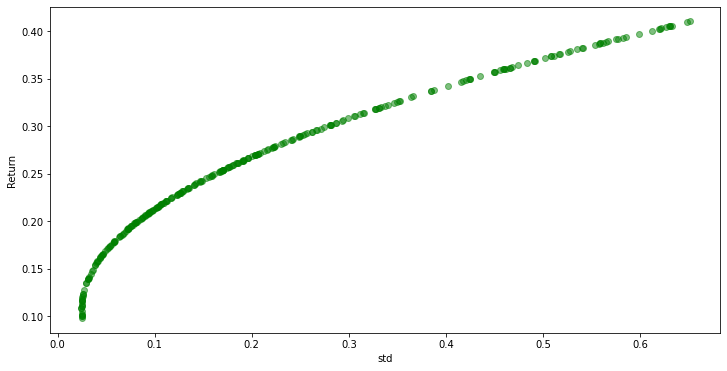

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(val_3,mean_3, color='green', alpha = 0.5)
ax.set_xlabel("std")
ax.set_ylabel("Return")
plt.show()

In [ ]:
max_risk=0.5
max_ret = exp_rets_3.max()
min_ret = exp_rets_3[exp_rets_3 > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(0, n_step+1):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_3, exp_rets_3, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_3), _w))

    if risk > max_risk:
        break

    risks.append(risk)
    ret = np.dot(exp_rets_3, _w)
    rets.append(ret)
    weights.append(_w)


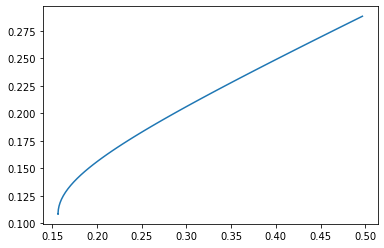

In [ ]:
plt.plot(risks, rets)
plt.show()

In [ ]:
min_risk_idx = np.argmin(risks)
min_risk = risks[min_risk_idx] 
min_risk_ret = rets[min_risk_idx]
min_risk_weight = weights[min_risk_idx]
print("Risk of minimum variance portfolio : ", min_risk)
print("Return of minimum variance portfolio : ", min_risk_ret)
print("Weight of minimum variance portfolio :  ")
print(min_risk_weight)

Risk of minimum variance portfolio :  0.15650584624885275
Return of minimum variance portfolio :  0.10861842791398127
Weight of minimum variance portfolio :  
KBSTAR 코스닥150선물레버리지      0.037245
KODEX 글로벌4차산업로보틱스(합성)    0.962755
dtype: float64


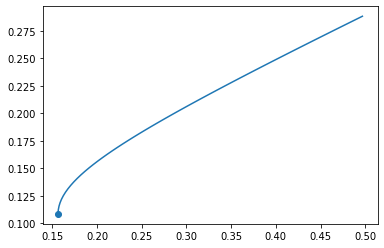

In [ ]:
plt.plot(risks, rets)
plt.scatter(min_risk, min_risk_ret)
plt.show()

In [ ]:
# Efficient Frontier

max_risk=0.5
max_ret = exp_rets_3.max()
min_ret = exp_rets_3[exp_rets_3 > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_3, exp_rets_3, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_3), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets_3, _w)
    rets.append(ret)
    weights.append(_w)


rf_rate = 0.005

slopes = []

# ToDo
for i in range(len(rets)):
    slope_ = (rets[i] - rf_rate) / risks[i]
    slopes.append(slope_)

max_tangency_idx = np.argmax(slopes)
max_tangency = slopes[max_tangency_idx]

In [ ]:
max_tangency_risk = risks[max_tangency_idx]
max_tangency_return = rets[max_tangency_idx]
max_tangency_weight = weights[max_tangency_idx]

print("Risk of tangency portfolio : ", max_tangency_risk)
print("Return of tangency portfolio : ", max_tangency_return)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return - rf_rate) / max_tangency_risk)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight)

Risk of tangency portfolio :  0.18196310923758874
Return of tangency portfolio :  0.14401053566999605
Sharpe ratio of tangency portfolio :  0.7639490018193213
Weight of minimum variance portfolio : 
KBSTAR 코스닥150선물레버리지      0.15
KODEX 글로벌4차산업로보틱스(합성)    0.85
dtype: float64


In [ ]:
ys = []
for i in range(len(risks)):
    ys.append(max_tangency * risks[i] + rf_rate)

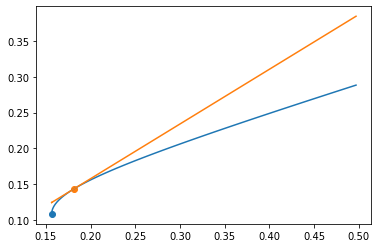

In [ ]:
plt.plot(risks, rets)
plt.plot(risks, ys)
plt.scatter(min_risk, min_risk_ret)
plt.scatter(max_tangency_risk, max_tangency_return)
plt.show()